## Example

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from codec import *
#Una opcion para estructurar el file codec es armar una clase "Codec"que tenga de metodos a "encoder" y a "decoder"
# "encoder" y "decoder" comparten constantes que pueden ser atributos de la clase Codec.

from rawfile import RawFile
import warnings

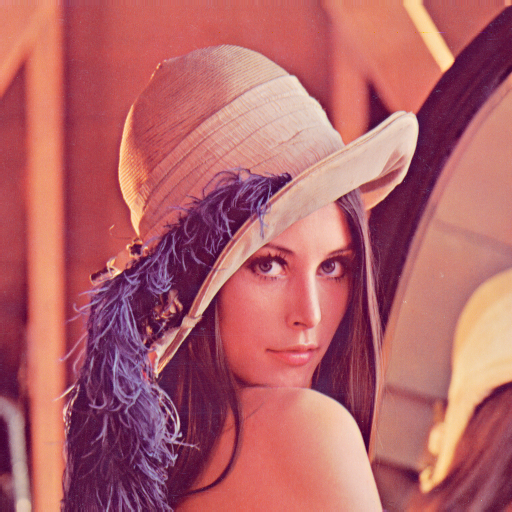

In [25]:
from PIL import Image

path = "../images/"
input_file = path + 'lena.png'  # file to compress
image = Image.open(input_file)
# image = image.convert('YCbCr')
# image
# Convert back to RGB before saving or displaying
image_rgb = image.convert('RGB')
image_rgb

(32, 32)


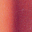

In [26]:
from PIL import Image

image = Image.open(input_file)

idx = 50
cropped_image = image.crop((0+idx, 0+idx, 32+idx, 32+idx))

print(cropped_image.size)
cropped_image

In [27]:
# Save the cropped image as a PNG
output_file = 'lena_cropped.png'
cropped_image.save(output_file)

print(f"Cropped image saved as {output_file}")

Cropped image saved as lena_cropped.png


# Algorithm 1: Encoder


In [51]:
a = [].append(2)
print(a)

None


In [53]:
input_file = path + 'lena.png' # file a comprimir
output_file = 'lena.fif' # path para archivo comprimido
max_error = 0.1
basis_index = 0  # Example value for basis index

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    code(input_file = input_file,
         output_file = output_file,
         max_error = max_error,
         basis_index = basis_index,
         )

min_n = 8, max_n = 32
image size: (512, 512)
Image Mode: YCbCr, Depth: 3, Width: 512, Height: 512
Initializing omp_dict[32] with matrix A of shape (1024, 256)
write processed_blocks 768
bytes_written: 506011


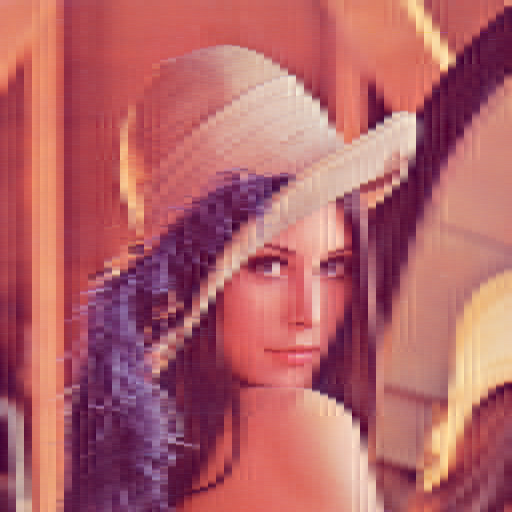

In [54]:
image1 = Image.open("lenna_test.png")
# image1 = image1.convert('RGB')
image1

# Algorithm 2: Decoder

In [55]:
input_file = 'lena.fif'
output_file = 'lena_reconstructed.png'
decode(input_file, output_file)

Output file saved to: lena_reconstructed.png


# SSIM

SSIM Index: 0.4465637591423854


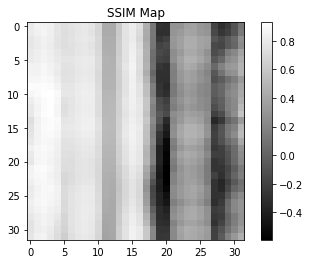

In [32]:
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

image1 = img_as_float(io.imread('lena_cropped.png', as_gray=True))
image2 = img_as_float(io.imread('lena_cropped_reconstructed.png', as_gray=True))

if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

data_range = image1.max() - image1.min()

ssim_index, ssim_image = ssim(image1, image2, full=True, data_range=data_range)

print(f"SSIM Index: {ssim_index}")

plt.imshow(ssim_image, cmap='gray')
plt.title('SSIM Map')
plt.colorbar()
plt.show()

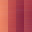

In [33]:
image1 = Image.open("lena_cropped_reconstructed.png")
image1 = image1.convert('RGB')
image1

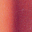

In [34]:
image1 = Image.open("lena_cropped.png")
image1 = image1.convert('RGB')
image1

SSIM Index: 0.649164739289536


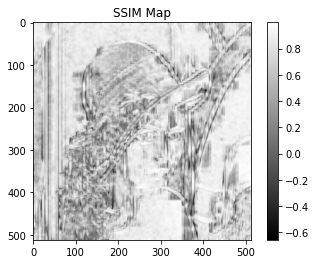

In [56]:
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

image1 = img_as_float(io.imread(path + 'lena.png', as_gray=True))
image2 = img_as_float(io.imread('lena_reconstructed.png', as_gray=True))

if image1.shape != image2.shape:
    raise ValueError("Input images must have the same dimensions.")

data_range = image1.max() - image1.min()

ssim_index, ssim_image = ssim(image1, image2, full=True, data_range=data_range)

print(f"SSIM Index: {ssim_index}")

plt.imshow(ssim_image, cmap='gray')
plt.title('SSIM Map')
plt.colorbar()
plt.show()

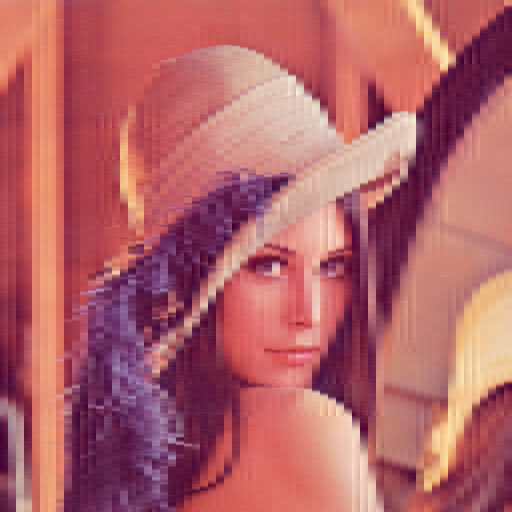

In [57]:
image1 = Image.open("lena_reconstructed.png")
image1 = image1.convert('RGB')
image1

In [58]:
n= 32
[(x, y) for x in [0,int(n/2)] for y in [0,int(n/2)]]

[(0, 0), (0, 16), (16, 0), (16, 16)]

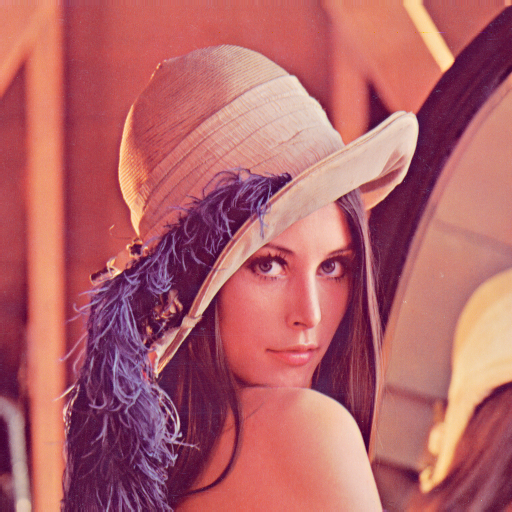

In [59]:
image1 = Image.open(path + "lena.png")
image1 = image1.convert('RGB')
image1